In [83]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold \
        , cross_val_score, GridSearchCV


plt.rcParams["figure.figsize"] = (16, 9)
sns.set_style('whitegrid')

In [84]:
df = pd.read_csv('train.csv')
df.set_index('PassengerId', inplace=True)

In [85]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [87]:
df['female'] = df.Sex.apply(lambda x: 1 if x == 'female' else 0)
df = df.drop('Sex', axis=1)

In [88]:
df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1
5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0


In [89]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,female
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [90]:
df.Age = df.Age.fillna(
    df.groupby('female').Age.transform('mean')
)

df.Cabin = df.Cabin.str[0]
# df.Cabin = df.Cabin.fillna(
#     df.Cabin.value_counts().index[0]
# )

df.Embarked = df.Embarked.fillna(
    df.Embarked.value_counts().index[0]
)

In [91]:
df.Cabin.unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [92]:
cabin_dict = {
    'C': 2, 'E' : 4, 'G': 6, 'D': 3, 'A': 0, 'B': 1, 'F': 5, 'T': 7
}

In [93]:
cabin_dict

{'C': 2, 'E': 4, 'G': 6, 'D': 3, 'A': 0, 'B': 1, 'F': 5, 'T': 7}

In [94]:
df.Cabin = df.Cabin.fillna(df.Cabin.value_counts().index[0])

In [95]:
df.Cabin = df.Cabin.apply(lambda x: cabin_dict[x])

In [96]:
df.isna().any().any()

False

In [97]:
numeric_columns = df.loc[:, df.dtypes != object].columns
categorical_columns = df.loc[:, df.dtypes == object].columns

In [98]:
numeric_columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'female'],
      dtype='object')

<AxesSubplot:>

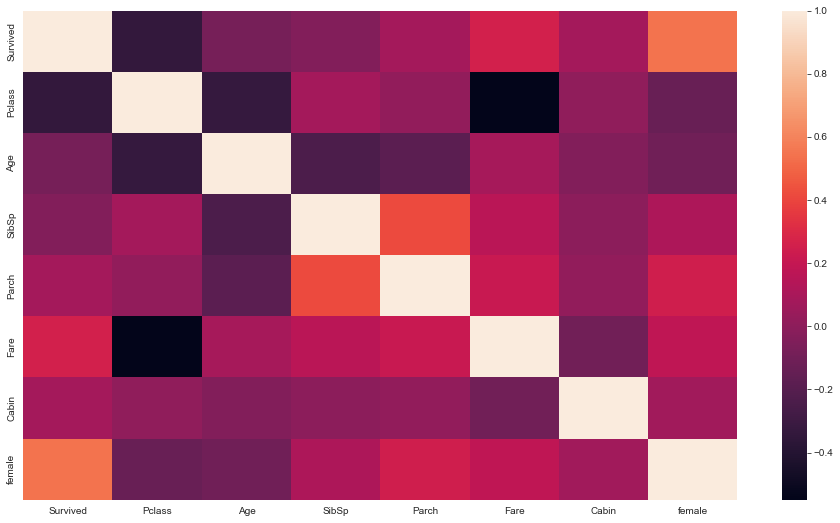

In [99]:
fig = plt.figure(figsize=(16, 9))

sns.heatmap(df[numeric_columns].corr())

In [42]:
df[categorical_columns].describe()

,Name,Ticket,Embarked
count,891,891,891
unique,891,681,3
top,"Braund, Mr. Owen Harris",347082,S
freq,1,7,646


In [43]:
df.sample(10)

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female
PassengerId,,,,,,,,,,,
851,0,3,"Andersson, Master. Sigvard Harald Elias",4.000000,4,2,347082,31.2750,2,S,0
387,0,3,"Goodwin, Master. Sidney Leonard",1.000000,5,2,CA 2144,46.9000,2,S,0
753,0,3,"Vande Velde, Mr. Johannes Joseph",33.000000,0,0,345780,9.5000,2,S,0
75,1,3,"Bing, Mr. Lee",32.000000,0,0,1601,56.4958,2,S,0
850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",27.915709,1,0,17453,89.1042,2,C,1
447,1,2,"Mellinger, Miss. Madeleine Violet",13.000000,0,1,250644,19.5000,2,S,1
179,0,2,"Hale, Mr. Reginald",30.000000,0,0,250653,13.0000,2,S,0
312,1,1,"Ryerson, Miss. Emily Borie",18.000000,2,2,PC 17608,262.3750,1,C,1
603,0,1,"Harrington, Mr. Charles H",30.726645,0,0,113796,42.4000,2,S,0


In [100]:
df = df.drop(['Name', 'Ticket'], axis=1)

In [101]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,female
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,2,S,0
2,1,1,38.0,1,0,71.2833,2,C,1
3,1,3,26.0,0,0,7.9250,2,S,1
4,1,1,35.0,1,0,53.1000,2,S,1
5,0,3,35.0,0,0,8.0500,2,S,0


In [104]:
df.isna().any().any()

False

In [106]:
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

<AxesSubplot:xlabel='Cabin'>

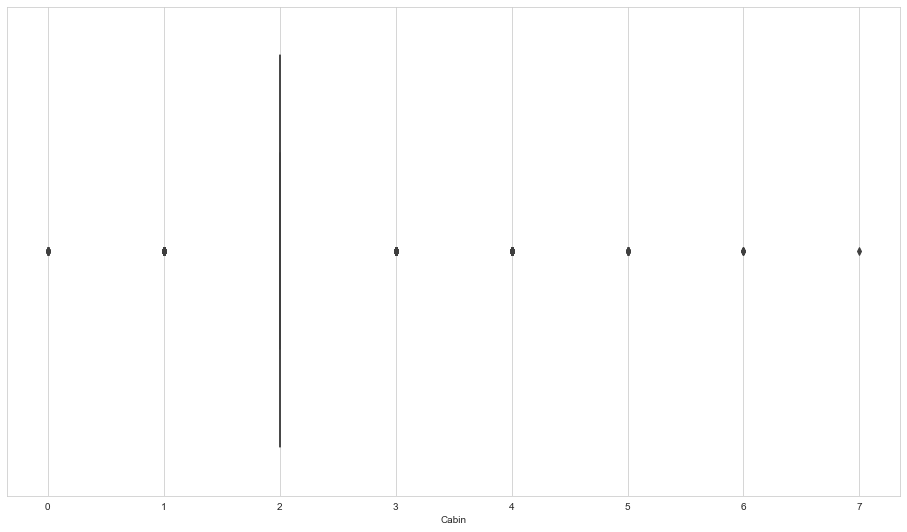

In [110]:
sns.boxplot(df.Cabin)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

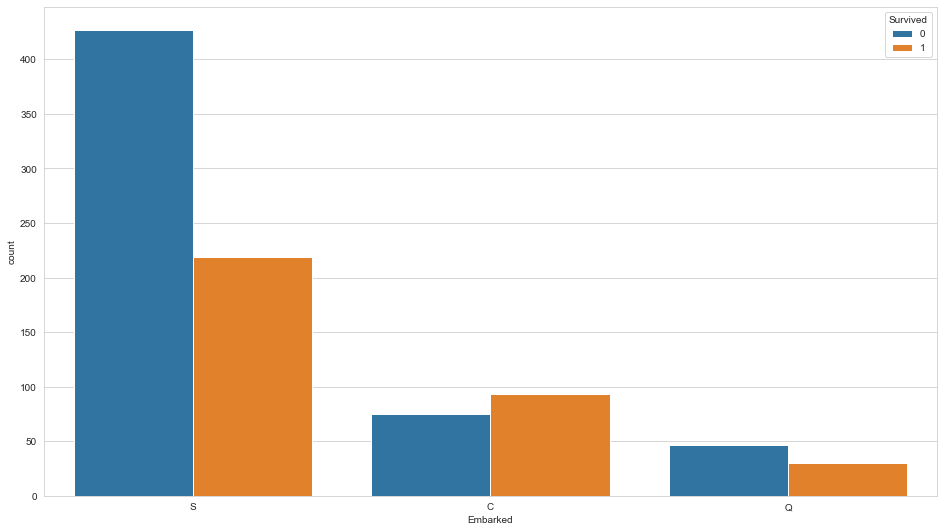

In [108]:
# temp = df.groupby('')

sns.countplot(x=df.Embarked, hue=df.Survived)

<AxesSubplot:xlabel='Cabin', ylabel='count'>

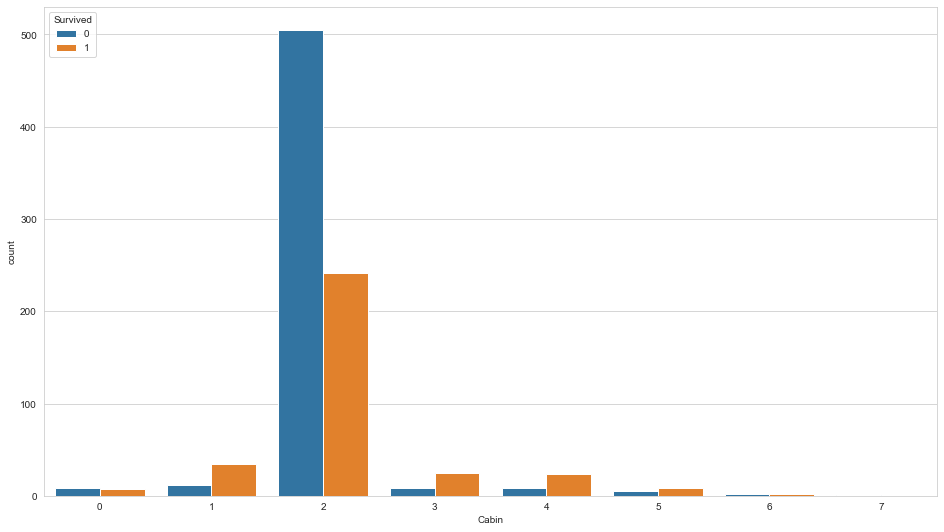

In [50]:
sns.countplot(x=df.Cabin, hue=df.Survived)

<AxesSubplot:xlabel='Fare'>

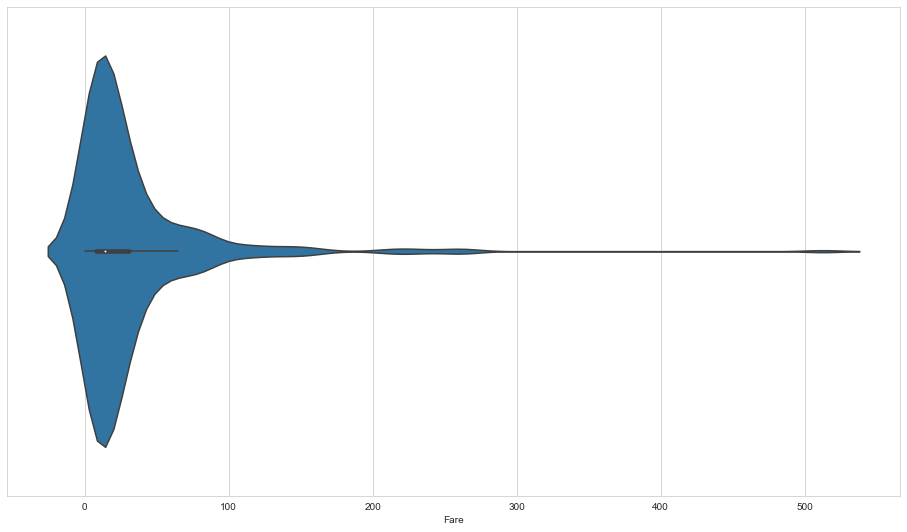

In [56]:
sns.violinplot(df.Fare)

In [58]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked', 'female'],
      dtype='object')

Text(0.5, 0, 'Sex')

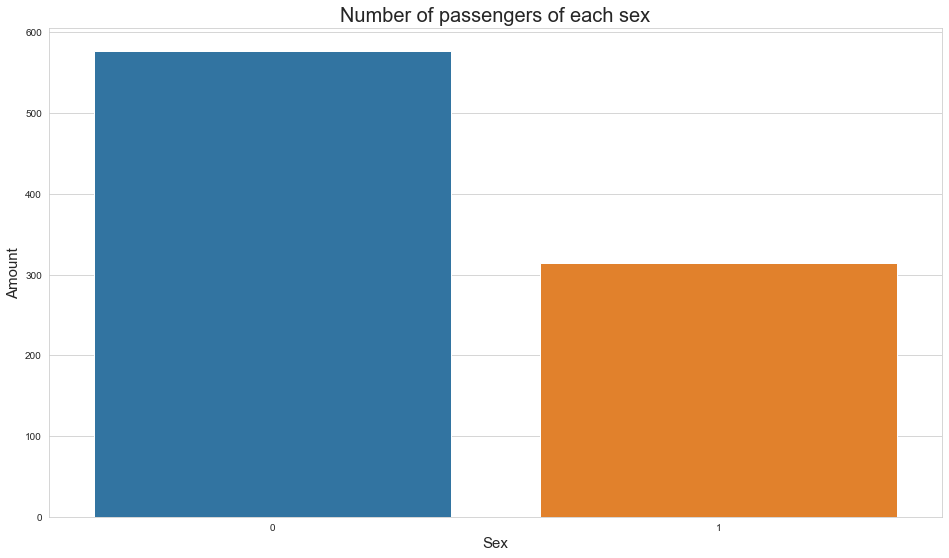

In [59]:
# fig = plt.figure(figsize=(16, 9))
sns.set_style('whitegrid')

sns.barplot(x=df['female'].unique()
            , y=df.reset_index().groupby('female').PassengerId.count())
plt.title('Number of passengers of each sex', fontsize=20)
plt.ylabel('Amount', fontsize=15)
plt.xlabel('Sex', fontsize=15)

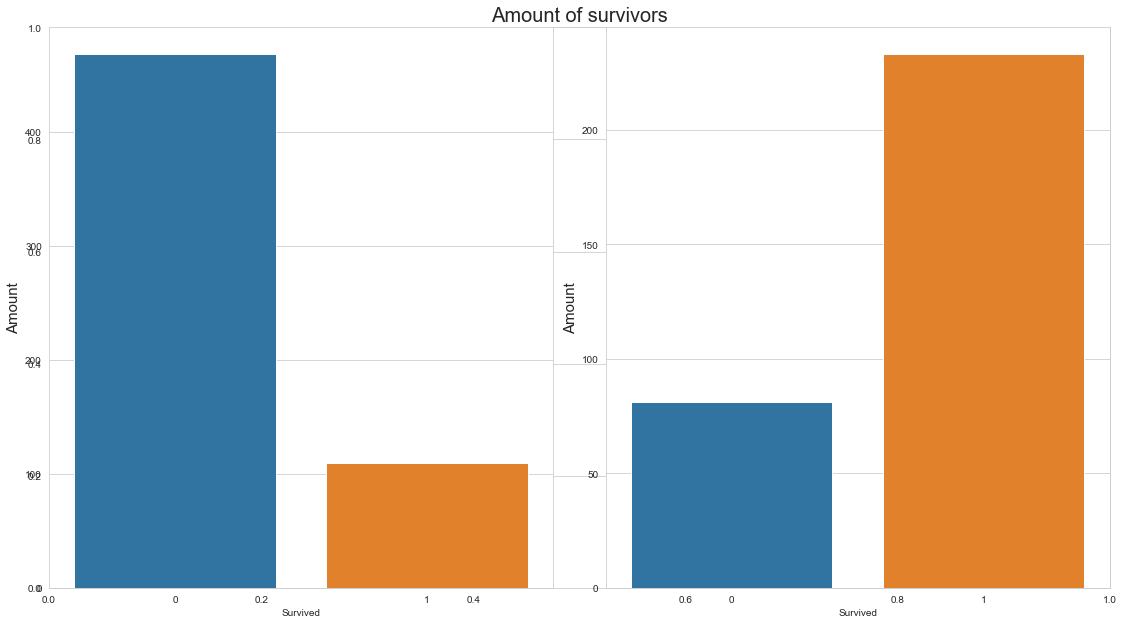

In [60]:
fig = plt.figure()
plt.title('Amount of survivors', fontsize=20)
for sex in df.female.unique():
    sex_df = df[df.female == sex] \
        .reset_index().groupby('Survived').PassengerId.count()
    
    ax = fig.add_subplot(1, 2, sex + 1)
    sns.barplot(x=sex_df.index, y=sex_df)
    
    plt.ylabel('Amount', fontsize=15)
plt.tight_layout()

Text(0.5, 1.0, 'Age')

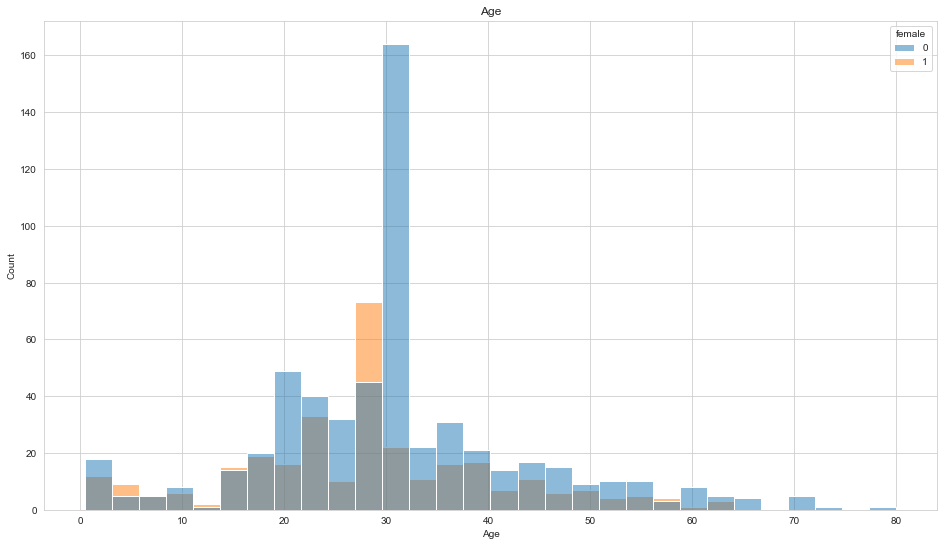

In [20]:
fig = plt.figure()

sns.histplot(x=df.Age, hue=df.female)
plt.title('Age')

Text(0.5, 1.0, 'Dead')

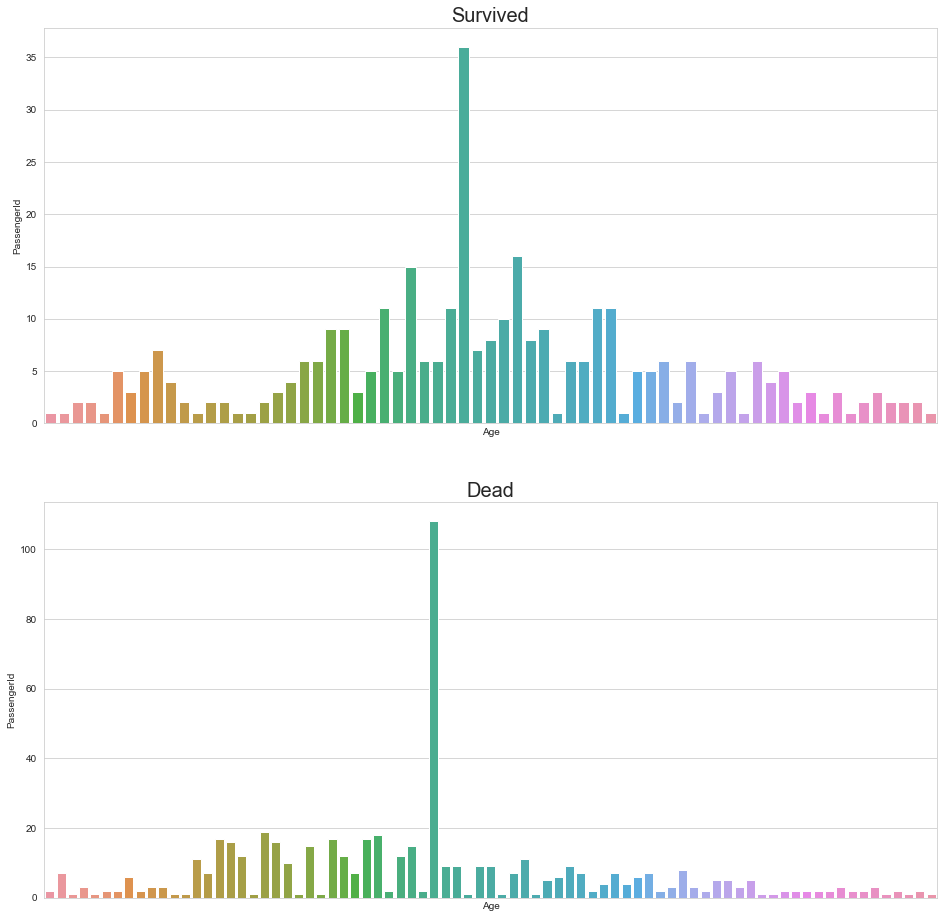

In [21]:
fig = plt.figure(figsize=(16, 16))

ax1 = fig.add_subplot(2, 1, 1)
grouped_age_df = df[df.Survived == 1].reset_index() \
                .groupby('Age').PassengerId.count() 

sns.barplot(x=grouped_age_df.index, y=grouped_age_df)
plt.xticks([])
plt.title('Survived', fontsize=20)

ax2 = fig.add_subplot(2, 1, 2)
grouped_age_df = df[df.Survived == 0].reset_index() \
                .groupby('Age').PassengerId.count() 

sns.barplot(x=grouped_age_df.index, y=grouped_age_df)
plt.xticks([])
plt.title('Dead', fontsize=20)

Text(0.5, 0, 'Sex')

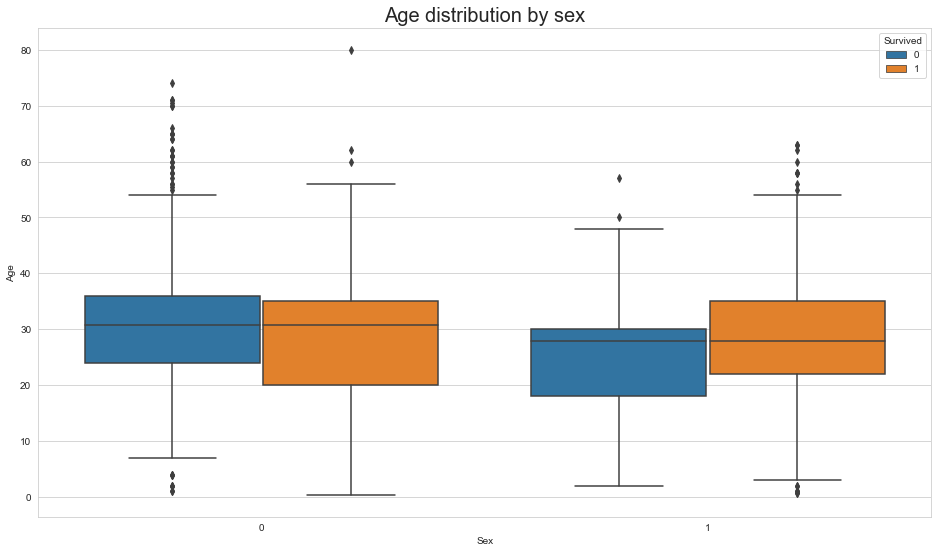

In [22]:
fig = plt.figure()

sns.boxplot(x=df.female, y=df.Age, hue=df.Survived)

plt.title('Age distribution by sex', fontsize=20)
plt.xlabel('Sex')

In [23]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked', 'female'],
      dtype='object')

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

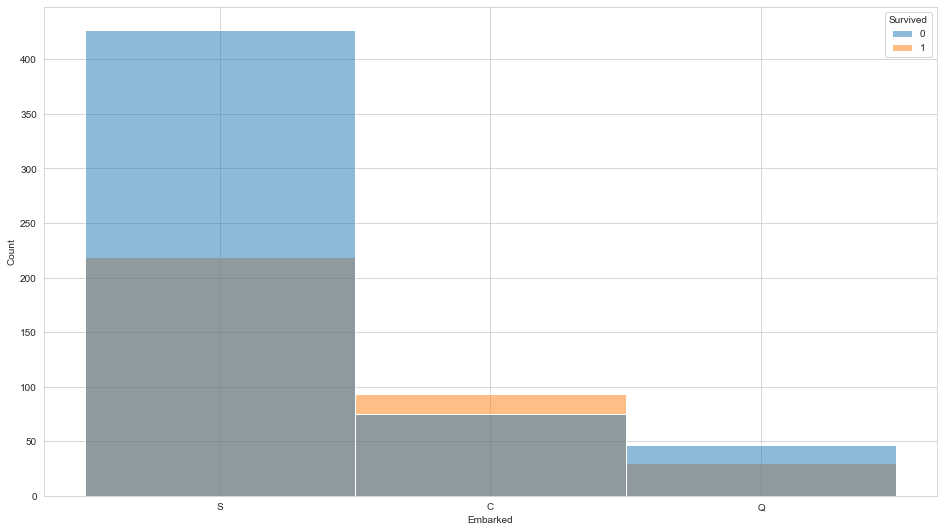

In [24]:
sns.histplot(data=df, x='Embarked', hue='Survived')

<AxesSubplot:xlabel='Parch', ylabel='Count'>

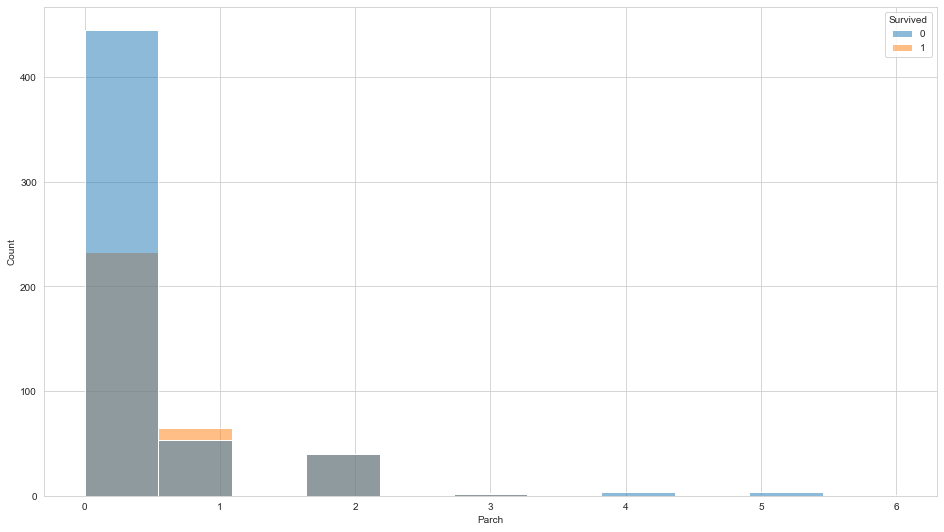

In [25]:
sns.histplot(data=df, x='Parch', hue='Survived')

(0.0, 280.0)

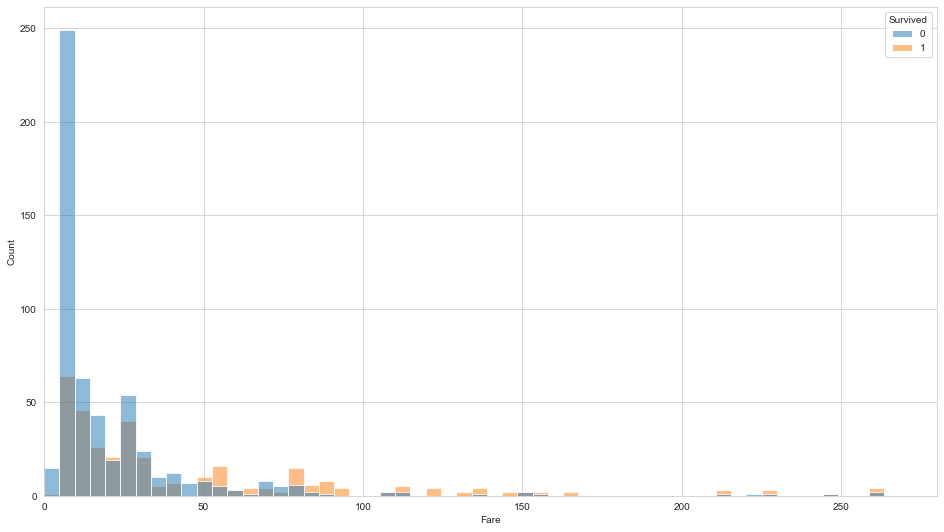

In [26]:
sns.histplot(data=df, x='Fare', hue='Survived')
plt.xlim(0, 280)

<AxesSubplot:xlabel='Cabin', ylabel='Count'>

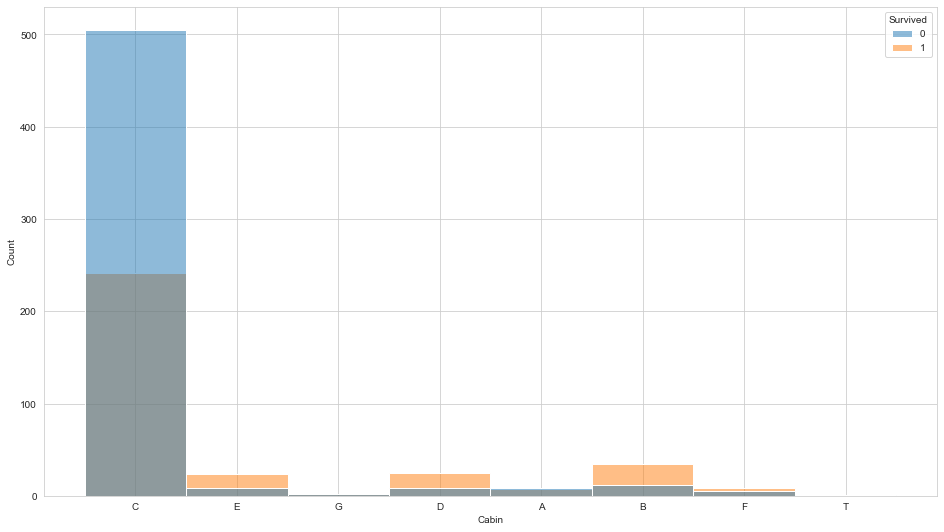

In [27]:
sns.histplot(data=df, x='Cabin', hue='Survived')

In [ ]:
sns.catplot(x=df.Em)

In [61]:
df.dtypes

Survived      int64
Pclass        int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin         int64
Embarked     object
female        int64
dtype: object

In [64]:
categorical_columns = df.loc[:, df.dtypes == object].columns

In [65]:
for col in categorical_columns:
    df = pd.concat(
        (df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, drop_first=True))
        , axis=1
    )

In [66]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,female,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,2,0,0,1
2,1,1,38.0,1,0,71.2833,2,1,0,0
3,1,3,26.0,0,0,7.9250,2,1,0,1
4,1,1,35.0,1,0,53.1000,2,1,0,1
5,0,3,35.0,0,0,8.0500,2,0,0,1


In [67]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'max_depth': range(1, 10, 2),
              'n_estimators': range(10, 50, 10),
              'min_samples_leaf': range(1, 7),
              'min_samples_split': range(2, 9, 2)}
model = RandomForestClassifier()
search = GridSearchCV(model, parameters, cv=10, n_jobs=-1)
search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 10, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 50, 10)})

In [69]:
search.best_params_

{'max_depth': 9,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 20}

In [70]:
best_model = search.best_estimator_
best_model.fit(X_train, y_train)
# best_model.fit(X, y)

RandomForestClassifier(max_depth=9, min_samples_leaf=5, n_estimators=20)

In [71]:
from sklearn.metrics import roc_auc_score, f1_score, precision_score \
, accuracy_score, recall_score

print(f'ROC-AUC: {roc_auc_score(y_test, best_model.predict(X_test))}')
print(f'Accuracy: {accuracy_score(y_test, best_model.predict(X_test))}')
print(f'Precision: {precision_score(y_test, best_model.predict(X_test))}')
print(f'Recall: {recall_score(y_test, best_model.predict(X_test))}')
print(f'F1: {f1_score(y_test, best_model.predict(X_test))}')

ROC-AUC: 0.8084942084942084
Accuracy: 0.8268156424581006
Precision: 0.8524590163934426
Recall: 0.7027027027027027
F1: 0.7703703703703704


In [106]:
test_df.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Is_female',
       'Name_Abelseth, Miss. Karen Marie',
       'Name_Abelseth, Mr. Olaus Jorgensen',
       'Name_Abrahamsson, Mr. Abraham August Johannes',
       'Name_Abrahim, Mrs. Joseph (Sophie Halaut Easu)',
       ...
       'Cabin_F', 'Cabin_F E46', 'Cabin_F E57', 'Cabin_F G63', 'Cabin_F2',
       'Cabin_F33', 'Cabin_F4', 'Cabin_G6', 'Embarked_Q', 'Embarked_S'],
      dtype='object', length=863)

In [133]:
test_df.head()

,Pclass,Age,SibSp,Parch,Fare,female,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Embarked_Q,Embarked_S,Cabin_T
PassengerId,,,,,,,,,,,,,,,
892,3.0,34.5,0.0,0.0,7.8292,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
893,3.0,47.0,1.0,0.0,7.0000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
894,2.0,62.0,0.0,0.0,9.6875,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
895,3.0,27.0,0.0,0.0,8.6625,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
896,3.0,22.0,1.0,1.0,12.2875,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [74]:
test_df = pd.read_csv('test.csv')

test_df.set_index('PassengerId', inplace=True)


test_df['female'] = test_df.Sex.apply(lambda x: 1 if x == 'female' else 0)

test_df.Age.fillna(
    np.mean(test_df.Age), inplace=True
)
test_df.Embarked.fillna(
    test_df.Embarked.value_counts().index[0], inplace=True
)
test_df.Fare.fillna(
    np.mean(test_df.Fare), inplace=True
)



test_df.Cabin = test_df.Cabin.str[0]
test_df.Cabin = test_df.Cabin.fillna(
    test_df.Cabin.value_counts().index[0]
)
test_df.Cabin = test_df.Cabin.apply(lambda x: cabin_dict[x])


test_df.drop(['Name', 'Ticket', 'Sex'], axis=1, inplace=True)
categorical_columns = test_df.loc[:, test_df.dtypes == object].columns



for col in categorical_columns:
    test_df = pd.concat(
        (test_df.drop(col, axis=1), pd.get_dummies(test_df[col], prefix=col, drop_first=True))
        , axis=1
    )

# test_df['Cabin_T'] = np.zeros(test_df.shape[0])

In [75]:
set(test_df.columns) == set(df.drop('Survived', axis=1).columns)

True

In [76]:
test_df.isna().any().any()

False

In [77]:
test_df.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'female',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [78]:
X.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'female',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [79]:
X_test = test_df
y_pred = best_model.predict(X_test)

In [80]:
result = pd.concat((test_df.reset_index()[['PassengerId']], pd.DataFrame(y_pred)), axis=1)

In [81]:
result.columns = ['PassengerId', 'Survived']

In [82]:
result.to_csv('result1.csv', index=False)